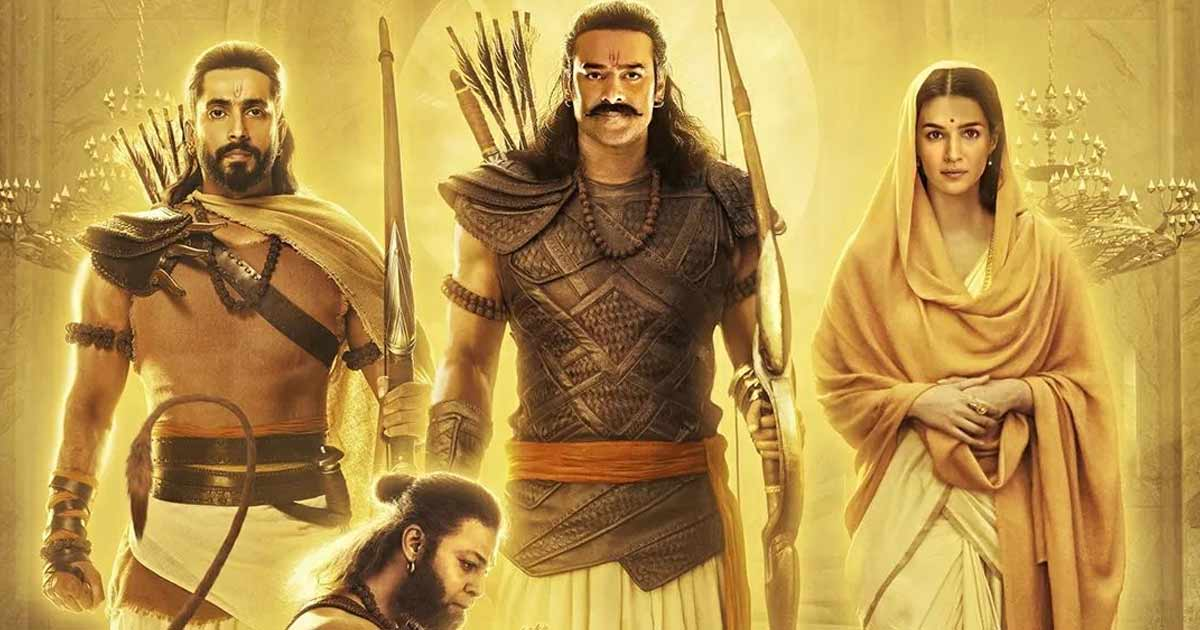


# Project Name: Adipurush Sentiment Analysis
## Project Backgruond Info
Adipurush is an upcoming Indian epic action-drama film that is highly anticipated by fans and film enthusiasts. The movie is being directed by Om Raut, known for his successful film "Tanhaji: The Unsung Warrior." Adipurush is based on the Hindu epic Ramayana and will retell the story of Lord Rama's battle against the demon king Ravana. 

One of the main highlights of Adipurush is the casting of popular Bollywood actor Prabhas in the role of Lord Rama. Prabhas gained immense popularity for his portrayal of the lead character in the Baahubali film series. The film also stars Saif Ali Khan, who will be playing the antagonist, Ravana, marking a unique and exciting casting choice.

Adipurush has generated a lot of buzz due to its grand scale and high production values. It is expected to be a visually stunning film with breathtaking action sequences. The movie is being shot in 3D, adding to the immersive experience for the audience.

The film's announcement and periodic updates have garnered widespread attention and excitement on social media platforms. Fans are eagerly anticipating the release of Adipurush to witness the epic tale of good versus evil unfold on the big screen.

## Dataset Overview
The provided dataset contains Twitter data related to Adipurush, including information such as Date Created, Number of Likes, Source of Tweet, and the actual Tweets about the movie. The dataset covers a specific timeframe of one month(June) within a particular year(2023).

## Project Aim
The aim of the "Adipurush Sentiment Analysis" project is to analyze the sentiment expressed in tweets and other social media posts related to the movie Adipurush. The project aims to gain insights into the overall sentiment of the audience towards the movie, whether it is positive, negative, or neutral. By conducting sentiment analysis, the project seeks to understand public perception, identify key themes or topics associated with the movie, and provide valuable feedback for filmmakers and marketers.

## Project Content
1. Data Wrangling
2. Data Exploration/Explanation
3. Data Pre-Proccessing
4. Wordcloud Representation for Sentiment Text
5. Application of Machine Learning

# 1. Data Wrangling Processes
## 1. Data Gathering 

In [65]:
# Import necessary dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [66]:
sns.set_style('darkgrid') # set grid color
sns.set_palette('Set2') # set color palette

## 2. Data Assessement

In [67]:
# Loading in the dataset
df = pd.read_csv('adipurush_tweets.csv')

In [68]:
df.head()

Date Created  Number of Likes  Source of Tweet  \
0  2023-06-30 09:21:00+00:00                0              NaN   
1  2023-06-30 09:20:57+00:00                0              NaN   
2  2023-06-30 09:20:22+00:00                0              NaN   
3  2023-06-30 09:20:00+00:00                3              NaN   
4  2023-06-30 09:15:22+00:00                3              NaN   

                                              Tweets  
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                             @ponilemova #Adipurush  
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4             ST: #Adipurush https://t.co/lsGKcgQuKL

In [69]:
df.shape

(10001, 4)

In [70]:
df.columns

Index(['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweets'], dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Created     10001 non-null  object 
 1   Number of Likes  10001 non-null  int64  
 2   Source of Tweet  0 non-null      float64
 3   Tweets           10001 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.7+ KB


In [72]:
df.describe()

Number of Likes  Source of Tweet
count     10001.000000              0.0
mean         73.537146              NaN
std         369.687928              NaN
min           0.000000              NaN
25%           0.000000              NaN
50%           1.000000              NaN
75%           9.000000              NaN
max       14778.000000              NaN

In [73]:
df.duplicated().sum()

1

In [74]:
df.isnull().sum()

Date Created           0
Number of Likes        0
Source of Tweet    10001
Tweets                 0
dtype: int64

In [75]:
df.nunique()

Date Created       9831
Number of Likes     718
Source of Tweet       0
Tweets             9874
dtype: int64

In [76]:
df_sorted = df.sort_values(by='Number of Likes', ascending=False)
df_sorted.head(10)

Date Created  Number of Likes  Source of Tweet  \
5036  2023-06-26 02:51:52+00:00            14778              NaN   
2975  2023-06-27 12:35:31+00:00             8266              NaN   
8180  2023-06-24 09:10:09+00:00             8112              NaN   
3593  2023-06-27 02:23:37+00:00             7010              NaN   
6069  2023-06-25 07:20:59+00:00             5580              NaN   
3601  2023-06-27 01:59:03+00:00             5149              NaN   
4744  2023-06-26 06:20:58+00:00             4912              NaN   
4716  2023-06-26 06:30:01+00:00             4788              NaN   
5636  2023-06-25 13:08:17+00:00             4741              NaN   
1559  2023-06-28 14:40:47+00:00             4561              NaN   

                                                 Tweets  
5036  Pan India Star #Prabhas clearly said NO for #A...  
2975  #Breaking: Comments by Allahabad high court to...  
8180  #Adipurush #Prabhas #BhushanKumar https://t.co...  
3593  आदिपुरुष निर्माताओं को लगा एक और झटका, इलाहाबा...  
6069  👉#AdiPurush Telugu Version Hits 100CR SHARE💥💥💥...  
3601  #Adipurush WW BO\n\nZOOMS past ₹4⃣0⃣0⃣ cr.\n\n...  
4744  #Adipurush goes from strength to strength at t...  
4716  We are incredibly touched by the overwhelming ...  
5636  Witness the epic saga unfold!🏹 \nBook your tic...  
1559  कुरान पर गलत तथ्यों के साथ एक छोटी सी डॉक्यूमे...

### 3. Data Cleaning 
1. change Date Created datatype from object to datatime
2. Drop Source of Tweet column
3. Drop duplicate records

In [77]:
# change Date Created datatype from object to datatime
df['Date Created'] = pd.to_datetime(df['Date Created'])

# Drop Source of Tweet column
df = df.drop('Source of Tweet', axis = 1)

# Drop duplicate records
df = df.drop_duplicates()

In [78]:
df.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
2 2023-06-30 09:20:22+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
4 2023-06-30 09:15:22+00:00                3   

                                              Tweets  
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                             @ponilemova #Adipurush  
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4             ST: #Adipurush https://t.co/lsGKcgQuKL

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date Created     10000 non-null  datetime64[ns, UTC]
 1   Number of Likes  10000 non-null  int64              
 2   Tweets           10000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 312.5+ KB


# 2. Data Exploration
#### Exploring Number of likes by date

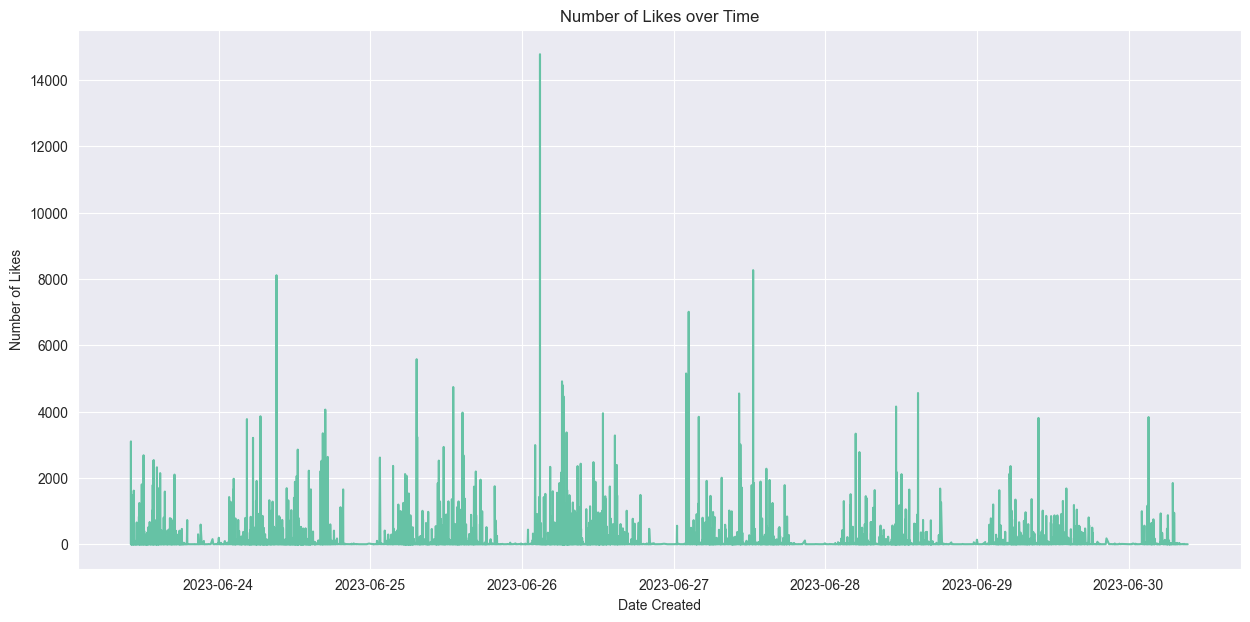

In [80]:
# Exploring Number of likes by date
df_sorted_date = df.sort_values('Date Created')
plt.figure(figsize=[15,7],)
plt.plot(df_sorted_date['Date Created'], df_sorted_date['Number of Likes'])
plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

#### Exploring Number of likes by date using Scatter plot 

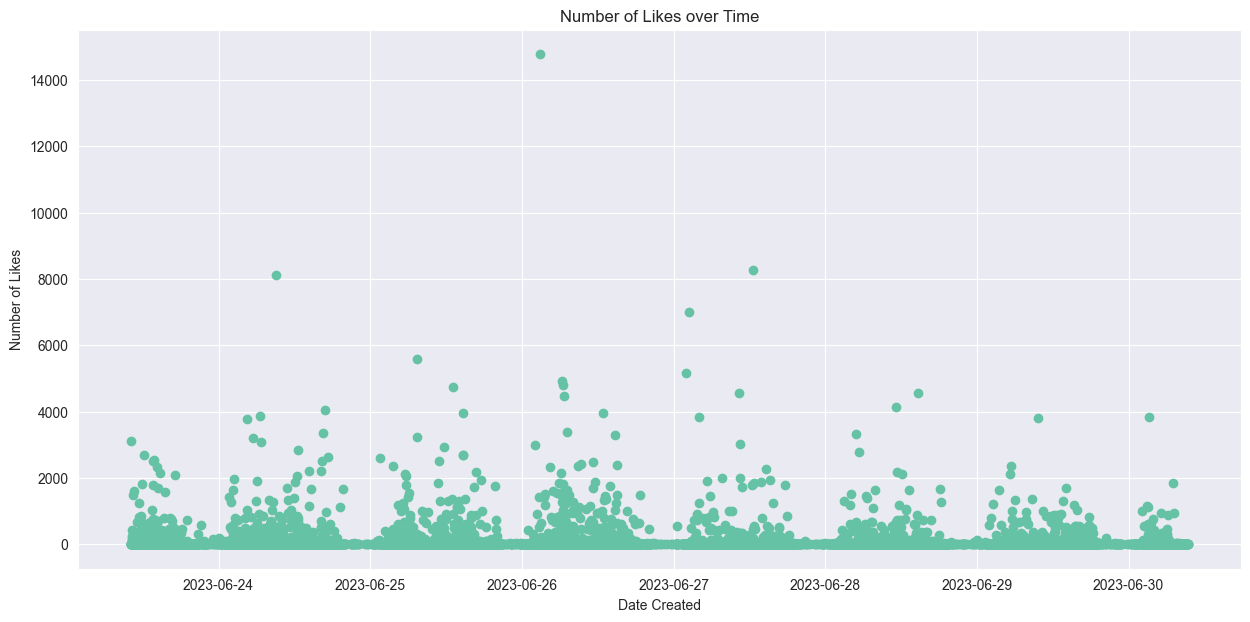

In [81]:
plt.figure(figsize=[15,7],)
plt.scatter(df_sorted_date['Date Created'], df_sorted_date['Number of Likes'])
plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

#### Exploring Number of likes by date using Scatter plot 

In [82]:
fig = px.scatter(df_sorted_date, x='Date Created', y='Number of Likes', title='Number of Likes over Time')
fig.update_layout(xaxis=dict(title='Date Created'), yaxis=dict(title='Number of Likes'))
fig.show()

### Import setiment Analysis Dependences

In [130]:
import re
import string
from tqdm.notebook import tqdm
from datetime import datetime
import calendar
import dateutil.parser

import nltk
#from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random 

In [84]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Let check all the languages supported by Stopwords

In [85]:
languages = stopwords.fileids()

# Print the number of supported languages
print("Number of supported languages:", len(languages))

# Print the list of supported languages
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


### Printing out list of Stopwords in English and Hinglish 

In [86]:
# downloading stopwords and printing out the english version of stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
print(stopwords.words('hinglish'))

['a', 'aadi', 'aaj', 'aap', 'aapne', 'aata', 'aati', 'aaya', 'aaye', 'ab', 'abbe', 'abbey', 'abe', 'abhi', 'able', 'about', 'above', 'accha', 'according', 'accordingly', 'acha', 'achcha', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'agar', 'ain', 'aint', "ain't", 'aisa', 'aise', 'aisi', 'alag', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'andar', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ap', 'apan', 'apart', 'apna', 'apnaa', 'apne', 'apni', 'appear', 'are', 'aren', 'arent', "aren't", 'around', 'arre', 'as', 'aside', 'ask', 'asking', 'at', 'aur', 'avum', 'aya', 'aye', 'baad', 'baar', 'bad', 'bahut', 'bana', 'banae', 'banai', 'banao', 'banaya', 'banaye', 'banayi', 'banda', 'bande', 'bandi', 'bane', 'bani', 'bas', 'bata', 'batao', 'bc', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand',

# Data Pre-proccessing
### Cleaning Tweet Feature

In [88]:
from nltk.tokenize import TweetTokenizer
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

def clean_tweet(tweet):
    # Remove URLs, hashtags, mentions, and special characters
    tweet = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(tweet)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet

In [89]:
df['Cleaned_Tweets'] = df['Tweets'].apply(clean_tweet)

In [90]:
df.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
2 2023-06-30 09:20:22+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
4 2023-06-30 09:15:22+00:00                3   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                             @ponilemova #Adipurush   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4             ST: #Adipurush https://t.co/lsGKcgQuKL   

                                      Cleaned_Tweets  
0  womens ashes 2023 live streaming broadcast tv ...  
1                                playing book ticket  
2                                                     
3  adipurush vs 72 hoorain vs kerala story contro...  
4                                                 st

In [91]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [92]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: clean_text(x))
df.Cleaned_Tweets.head()

0    womens ashes 2023 live streaming broadcast tv ...
1                                  playing book ticket
2                                                     
3    adipurush vs 72 hoorain vs kerala story contro...
4                                                   st
Name: Cleaned_Tweets, dtype: object

In [93]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [94]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: tokenization(x))

In [95]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [96]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [97]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [98]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [99]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: lemmatizer(x))

In [100]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [101]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits(x))

In [102]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) 
    return(clean_text)

In [103]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits1(x))

In [104]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['Cleaned_Tweets'].apply(detect_language)

In [105]:
df.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
2 2023-06-30 09:20:22+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
4 2023-06-30 09:15:22+00:00                3   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                             @ponilemova #Adipurush   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4             ST: #Adipurush https://t.co/lsGKcgQuKL   

                                      Cleaned_Tweets Language  
0  womens ashes live streaming broadcast tv chann...       en  
1                                playing book ticket       en  
2                                                        None  
3  adipurush vs hoorain vs kerala story controver...       en  
4                                                 st       no

In [106]:
# copy the old data into new variable
df1 = df.copy()

In [107]:
df1['english_tweets'] = df[df['Language'] == 'en']['Cleaned_Tweets']

In [108]:
df1

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  \
0      womens ashes live streaming broadcast tv chann...       en   
1                                    playing book ticket       en   
2                                                            None   
3      adipurush vs hoorain vs kerala story controver...       en   
4                                                     st       no   
...                                                  ...      ...   
9996   adipurush 1st week ww box office collections ఆ...       en   
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...       hi   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
2                                                    NaN  
3      adipurush vs hoorain vs kerala story controver...  
4                                                    NaN  
...                                                  ...  
9996   adipurush 1st week ww box office collections ఆ...  
9997                                                 NaN  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[10000 rows x 6 columns]

In [109]:
df1.isnull().sum()

Date Created          0
Number of Likes       0
Tweets                0
Cleaned_Tweets        0
Language            529
english_tweets     4910
dtype: int64

In [110]:
df1 = df1.dropna()

In [111]:
df1

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
5     2023-06-30 09:08:27+00:00                1   
8     2023-06-30 09:04:09+00:00                0   
...                         ...              ...   
9995  2023-06-23 10:09:41+00:00                1   
9996  2023-06-23 10:08:50+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5      This is how the story should be told. @omraut ...   
8      @VikasAgarwalll Milord says: If my compatriots...   
...                                                  ...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  \
0      womens ashes live streaming broadcast tv chann...       en   
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
5      story told learn hotstar india graphic india g...       en   
8      milord compatriots backstab ie end exposing fa...       en   
...                                                  ...      ...   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9996   adipurush 1st week ww box office collections ఆ...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
3      adipurush vs hoorain vs kerala story controver...  
5      story told learn hotstar india graphic india g...  
8      milord compatriots backstab ie end exposing fa...  
...                                                  ...  
9995   rangarajan garu poojari chilkur balaji appreci...  
9996   adipurush 1st week ww box office collections ఆ...  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[5090 rows x 6 columns]

### Extracting year, Month, day and Time from date Created

In [112]:
df1['Year'] = df1['Date Created'].dt.year

In [113]:
# Exracting week day number
df1['Weekdays'] = df1['Date Created'].apply(lambda time: time.dayofweek)

# matching each extracted day number to day abbreviation
mapping_day_num = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

# creating start and end week column in the existing dataset 
df1['Weekdays'] = df1['Weekdays'].map(mapping_day_num)

# Exracting months number of the year for the start trip and the end trip
df1['Month'] = df1['Date Created'].apply(lambda time: time.month)

# getting the months abbreviation for each month number extracted for both start and end month
df1['Month'] = df1['Month'].apply(lambda x: calendar.month_abbr[x])

**Extracting Time of the day using time function in pandas**

Here is a list of different parts of the day. There is no exact time when each one begins and ends, because they can vary according to your lifestyle and the hours of daylight at each time of year, but this list shows some approximate times that many people would agree with.

 

**Parts of the Day**

1. Morning ----- 5 am to 12 pm (noon)

* Early morning ----- 5 to 8 am

* Late morning ----- 11 am to 12pm
 

2. Afternoon ----- 12 pm to 5 pm

* Early afternoon ----- 1 to 3pm

* Late afternoon ----- 4 to 5pm
 

3. Evening ----- 5 pm to 9 pm

* Early evening ----- 5 to 7 pm

4. Night ----- 9 pm to 4 am

source <a href = "https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc">Reference</a>

In [114]:
# Extracting hour of the day from start time using datatime function in pandas 
df1['time_hour'] = df1['Date Created'].dt.hour

df1['Date time'] = 'Morning'
df1['Date time'][(df1['time_hour'] >= 12) & (df1['time_hour'] <= 16)] = 'Afternoon'
df1['Date time'][(df1['time_hour'] >= 17) & (df1['time_hour'] <=20)] = 'Evening'
df1['Date time'][(df1['time_hour'] >= 21) & (df1['time_hour'] <= 23)] = 'Night'

In [115]:
df1.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
5 2023-06-30 09:08:27+00:00                1   
8 2023-06-30 09:04:09+00:00                0   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5  This is how the story should be told. @omraut ...   
8  @VikasAgarwalll Milord says: If my compatriots...   

                                      Cleaned_Tweets Language  \
0  womens ashes live streaming broadcast tv chann...       en   
1                                playing book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   
5  story told learn hotstar india graphic india g...       en   
8  milord compatriots backstab ie end exposing fa...       en   

                                      english_tweets  Year Weekdays Month  \
0  womens ashes live streaming broadcast tv chann...  2023      Fri   Jun   
1                                playing book ticket  2023      Fri   Jun   
3  adipurush vs hoorain vs kerala story controver...  2023      Fri   Jun   
5  story told learn hotstar india graphic india g...  2023      Fri   Jun   
8  milord compatriots backstab ie end exposing fa...  2023      Fri   Jun   

   time_hour Date time  
0          9   Morning  
1          9   Morning  
3          9   Morning  
5          9   Morning  
8          9   Morning

In [116]:
df1.nunique()

Date Created       5054
Number of Likes     558
Tweets             5043
Cleaned_Tweets     4455
Language              1
english_tweets     4455
Year                  1
Weekdays              7
Month                 1
time_hour            24
Date time             4
dtype: int64

# Data Exploration/Explanation

In [117]:
df1['Tweet_Length'] = df1['english_tweets'].str.len()

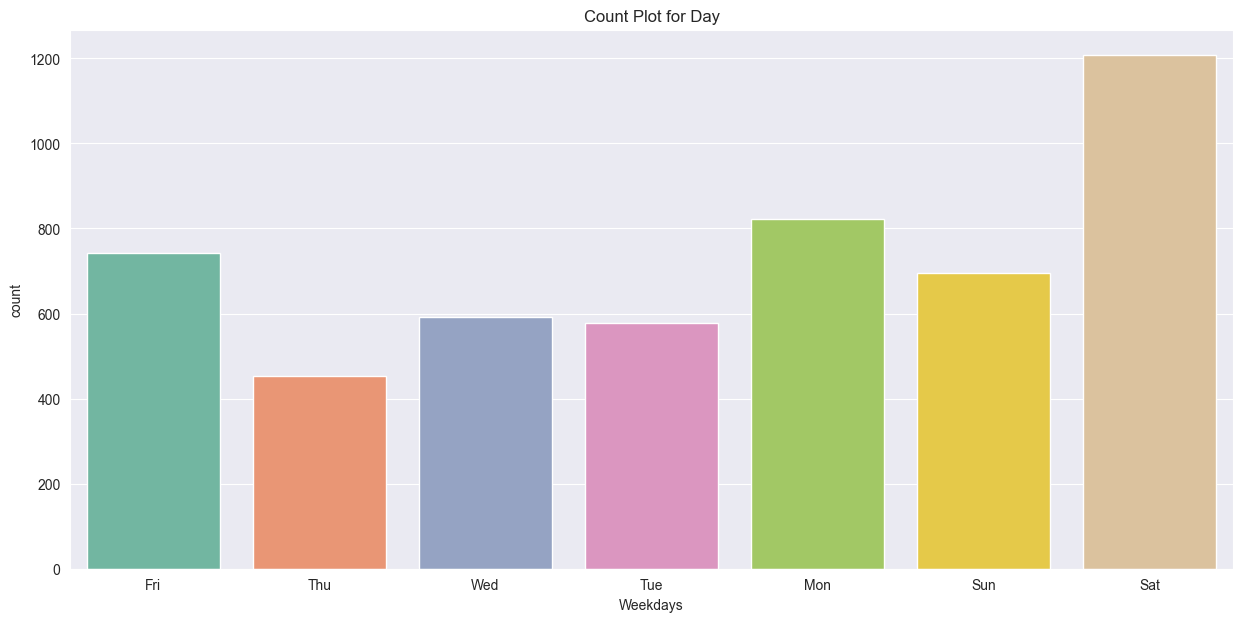

In [118]:
plt.figure(figsize=[15,7])
plt.title('Count Plot for Day')
sns.countplot(x = 'Weekdays', data = df1)
plt.xticks(rotation = 0)
plt.show()

In [119]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=df1['Weekdays'].value_counts().index, y=df1['Weekdays'].value_counts())])
fig.update_layout(
        title= 'Weekdays',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

Based on the visual above, it appears that Saturday having count of (**1211**) is the day when people frequently tweet about the Movie.

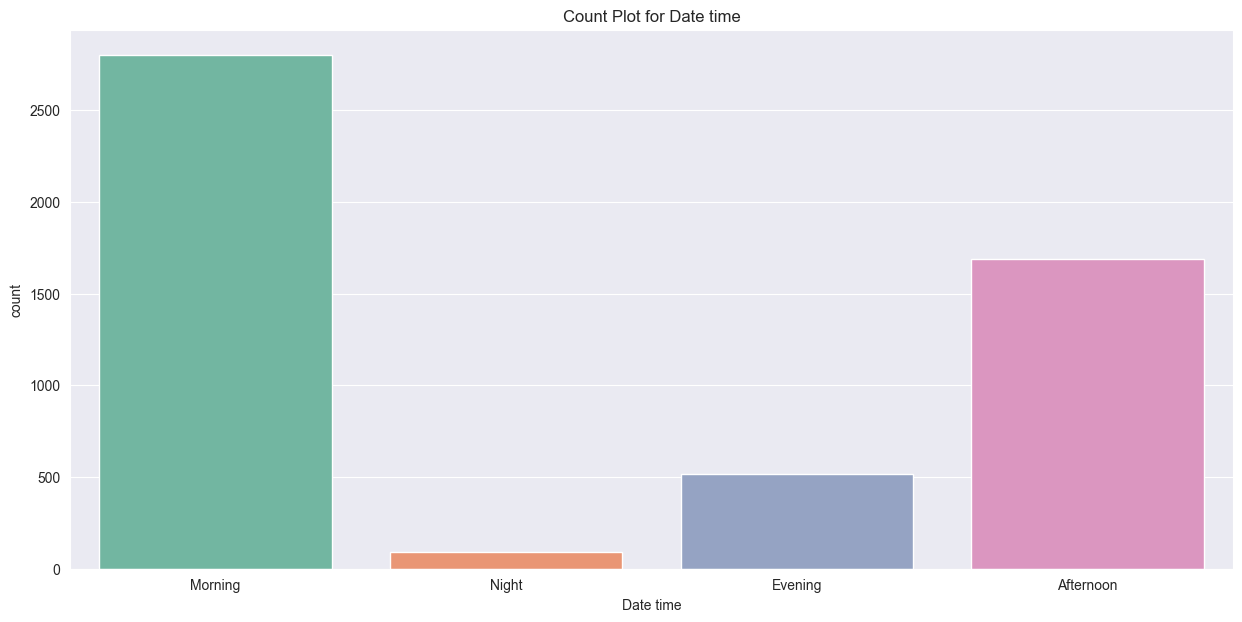

In [120]:
plt.figure(figsize=[15,7])
plt.title('Count Plot for Date time')
sns.countplot(x = 'Date time', data = df1)
plt.xticks(rotation = 0)
plt.show()

In [121]:

fig = go.Figure(data=[go.Bar(x=df1['Date time'].value_counts().index, y=df1['Date time'].value_counts())])
fig.update_layout(
        title= 'Date time',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

The majority of tweets about the Movie tend to occur during the morning hours about **2813 times**.

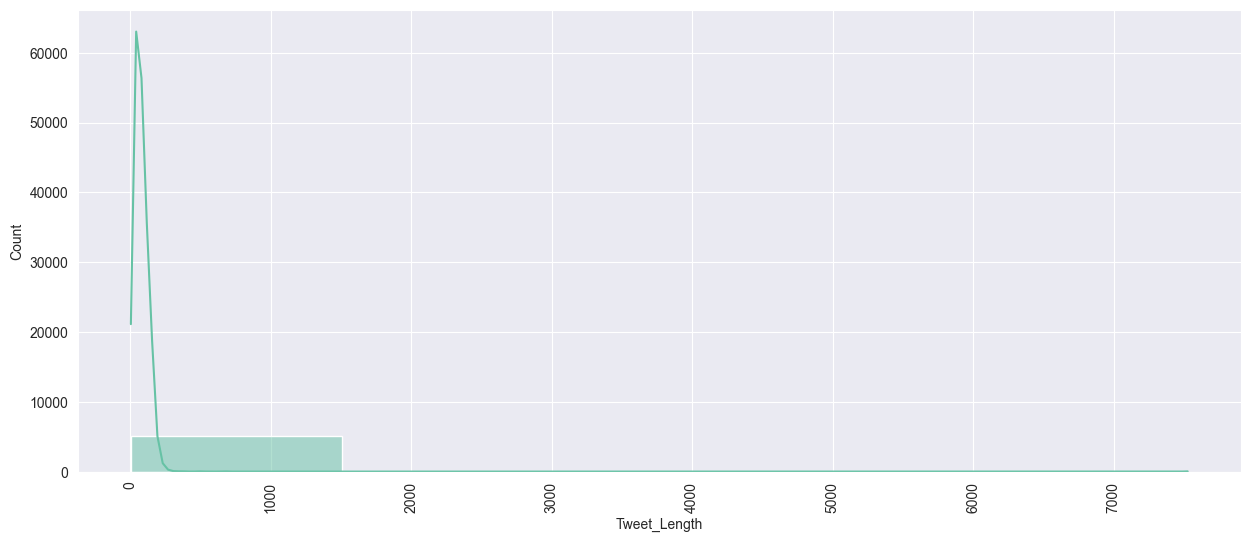

In [122]:
plt.figure(figsize=(15,6))
sns.histplot(df1['Tweet_Length'], kde = True, bins = 5, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [123]:
import plotly.express as px

fig = px.histogram(df1, x='Tweet_Length', nbins=20, histnorm='probability density')
fig.update_layout(title=f"Histogram of Tweet Length", xaxis_title='Tweet Length', yaxis_title="Probability Density")
fig.show()

In [124]:
fig = px.box(df1, y='Tweet_Length')
fig.update_layout(title=f"Box Plot of Tweet Length", yaxis_title='Tweet_Length')
fig.show()

# Check for the Positivity and Negativity of the Tweet

In [125]:
#spell = SpellChecker() 

In [126]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [127]:
sia = SIA()

In [131]:
df1['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df1['english_tweets'])]
df1['overall_sentiment'] = df1['sentiment'].apply(label_sentiment);

  0%|          | 0/5090 [00:00<?, ?it/s]

In [132]:
df1.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
5 2023-06-30 09:08:27+00:00                1   
8 2023-06-30 09:04:09+00:00                0   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5  This is how the story should be told. @omraut ...   
8  @VikasAgarwalll Milord says: If my compatriots...   

                                      Cleaned_Tweets Language  \
0  womens ashes live streaming broadcast tv chann...       en   
1                                playing book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   
5  story told learn hotstar india graphic india g...       en   
8  milord compatriots backstab ie end exposing fa...       en   

                                      english_tweets  Year Weekdays Month  \
0  womens ashes live streaming broadcast tv chann...  2023      Fri   Jun   
1                                playing book ticket  2023      Fri   Jun   
3  adipurush vs hoorain vs kerala story controver...  2023      Fri   Jun   
5  story told learn hotstar india graphic india g...  2023      Fri   Jun   
8  milord compatriots backstab ie end exposing fa...  2023      Fri   Jun   

   time_hour Date time  Tweet_Length  sentiment overall_sentiment  
0          9   Morning            64     0.0000           neutral  
1          9   Morning            19     0.2023           neutral  
3          9   Morning            55     0.0000           neutral  
5          9   Morning           114     0.0000           neutral  
8          9   Morning           117     0.4767          positive

In [133]:
df1['overall_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [134]:
df1['overall_sentiment'].value_counts()

overall_sentiment
neutral     1977
negative    1783
positive    1330
Name: count, dtype: int64

In [135]:

fig = go.Figure(data=[go.Bar(x=df1['overall_sentiment'].value_counts().index, y=df1['overall_sentiment'].value_counts())])
fig.update_layout(
        title= 'overall sentiment',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

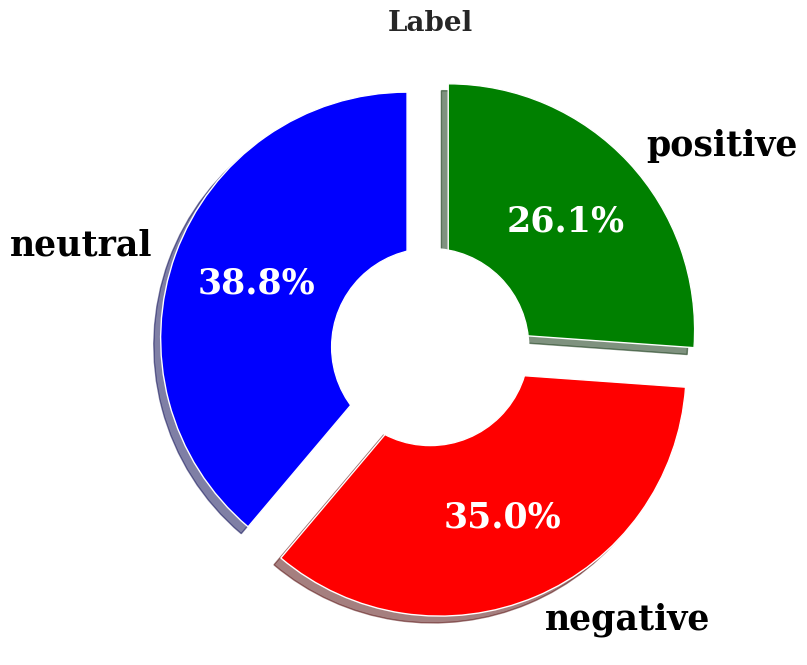

In [136]:
label_data = df1['overall_sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(8, 8))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [137]:
df1.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
5 2023-06-30 09:08:27+00:00                1   
8 2023-06-30 09:04:09+00:00                0   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5  This is how the story should be told. @omraut ...   
8  @VikasAgarwalll Milord says: If my compatriots...   

                                      Cleaned_Tweets Language  \
0  womens ashes live streaming broadcast tv chann...       en   
1                                playing book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   
5  story told learn hotstar india graphic india g...       en   
8  milord compatriots backstab ie end exposing fa...       en   

                                      english_tweets  Year Weekdays Month  \
0  womens ashes live streaming broadcast tv chann...  2023      Fri   Jun   
1                                playing book ticket  2023      Fri   Jun   
3  adipurush vs hoorain vs kerala story controver...  2023      Fri   Jun   
5  story told learn hotstar india graphic india g...  2023      Fri   Jun   
8  milord compatriots backstab ie end exposing fa...  2023      Fri   Jun   

   time_hour Date time  Tweet_Length  sentiment overall_sentiment  
0          9   Morning            64     0.0000           neutral  
1          9   Morning            19     0.2023           neutral  
3          9   Morning            55     0.0000           neutral  
5          9   Morning           114     0.0000           neutral  
8          9   Morning           117     0.4767          positive

In [138]:
df2 = df1[['english_tweets', 'overall_sentiment']]

In [139]:
df2.head()

english_tweets overall_sentiment
0  womens ashes live streaming broadcast tv chann...           neutral
1                                playing book ticket           neutral
3  adipurush vs hoorain vs kerala story controver...           neutral
5  story told learn hotstar india graphic india g...           neutral
8  milord compatriots backstab ie end exposing fa...          positive

In [140]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove extra white spaces
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    # Split the text into words
    words = cleaned_text.split()
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the clean_text function to the 'english_tweets' column
df2['Cleaned_English_Tweets'] = df2['english_tweets'].apply(clean_text)

In [141]:
df2.head()

english_tweets overall_sentiment  \
0  womens ashes live streaming broadcast tv chann...           neutral   
1                                playing book ticket           neutral   
3  adipurush vs hoorain vs kerala story controver...           neutral   
5  story told learn hotstar india graphic india g...           neutral   
8  milord compatriots backstab ie end exposing fa...          positive   

                              Cleaned_English_Tweets  
0  womens ashes live streaming broadcast tv chann...  
1                                playing book ticket  
3  adipurush vs hoorain vs kerala story controver...  
5  story told learn hotstar india graphic india g...  
8  milord compatriots backstab ie end exposing fa...

In [142]:
df2 = df2.drop('english_tweets', axis = 1)

In [143]:
df2

overall_sentiment                             Cleaned_English_Tweets
0               neutral  womens ashes live streaming broadcast tv chann...
1               neutral                                playing book ticket
3               neutral  adipurush vs hoorain vs kerala story controver...
5               neutral  story told learn hotstar india graphic india g...
8              positive  milord compatriots backstab ie end exposing fa...
...                 ...                                                ...
9995           positive  rangarajan garu poojari chilkur balaji appreci...
9996            neutral     adipurush st week ww box office collections st
9998           positive  empowering lyrics elevate spirit envelop world...
9999           positive  choosing service product beneficial opt authen...
10000          positive  film greatest epic earn boc worth budget shame...

[5090 rows x 2 columns]

In [144]:
non_meaningful_words = ['cr', 'amp', 'rs', 'u', 'l']

def remove_non_meaningful_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in non_meaningful_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df2['Cleaned_English_Tweets'] = df2['Cleaned_English_Tweets'].apply(remove_non_meaningful_words)

In [145]:
df2.head()

overall_sentiment                             Cleaned_English_Tweets
0           neutral  womens ashes live streaming broadcast tv chann...
1           neutral                                playing book ticket
3           neutral  adipurush vs hoorain vs kerala story controver...
5           neutral  story told learn hotstar india graphic india g...
8          positive  milord compatriots backstab ie end exposing fa...

# Exploring Word Cloud

In [146]:
import wordcloud

### 1. Using Wordcloud to represent General English words in the dataset

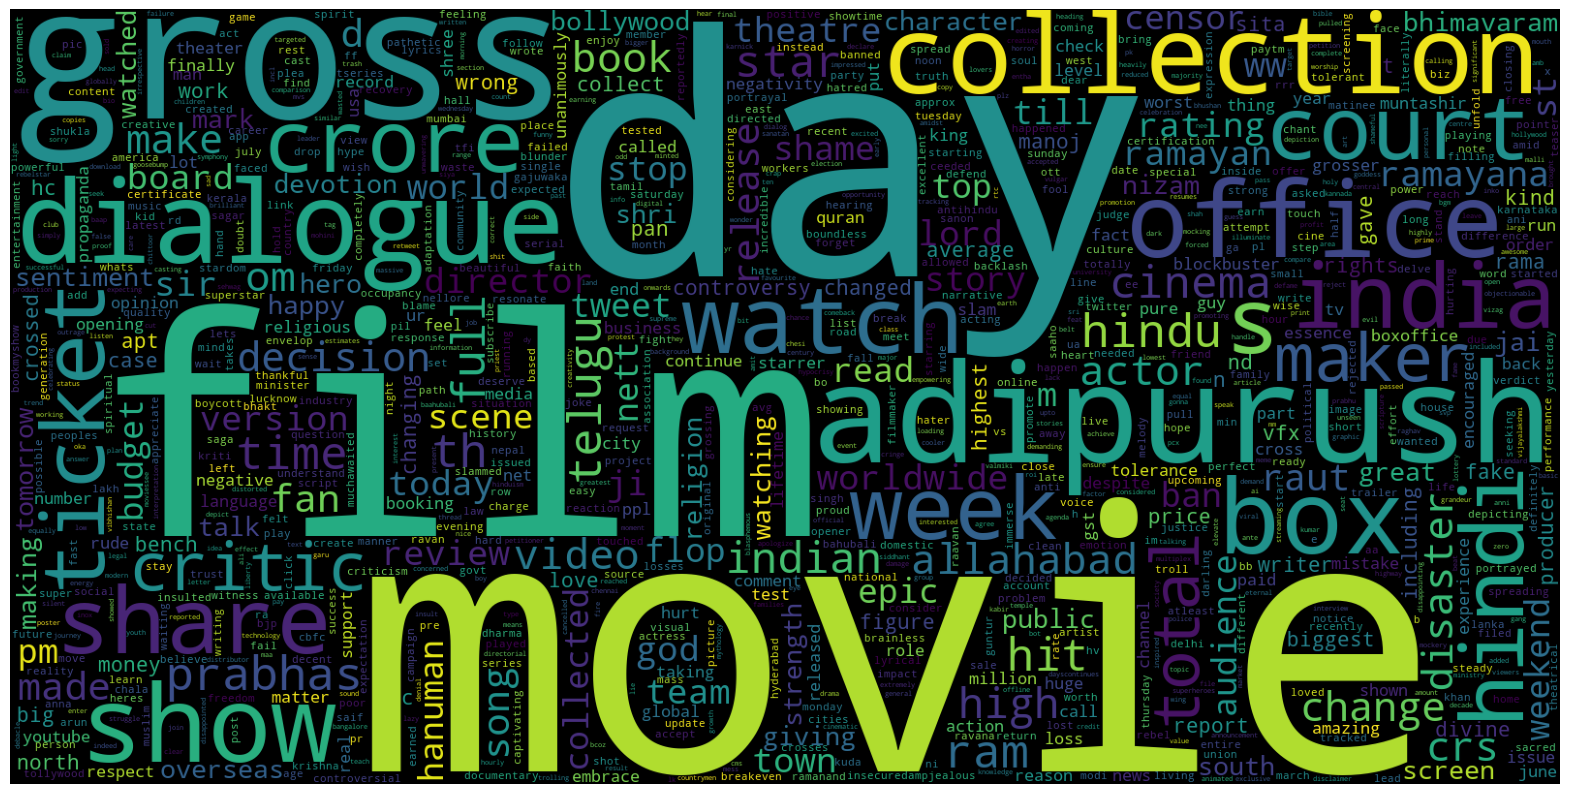

In [ ]:
from wordcloud import WordCloud
data = df2['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 2. Using Wordcloud to represent the Positive Sentiment words in the dataset

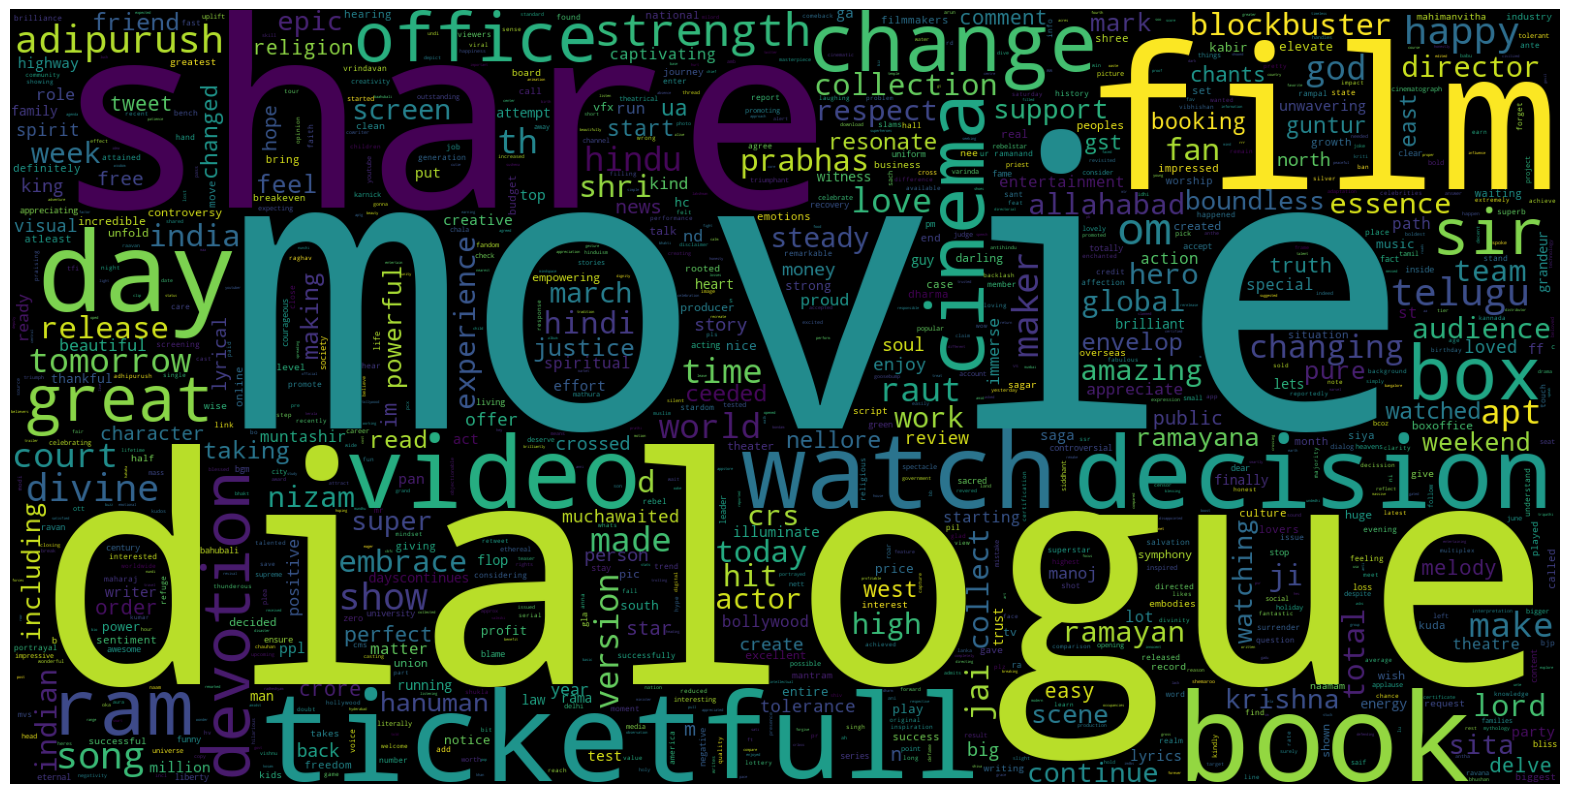

In [ ]:
data = df2[df2['overall_sentiment']=="positive"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 3. Using Wordcloud to represent the Negative Sentiment words in the dataset

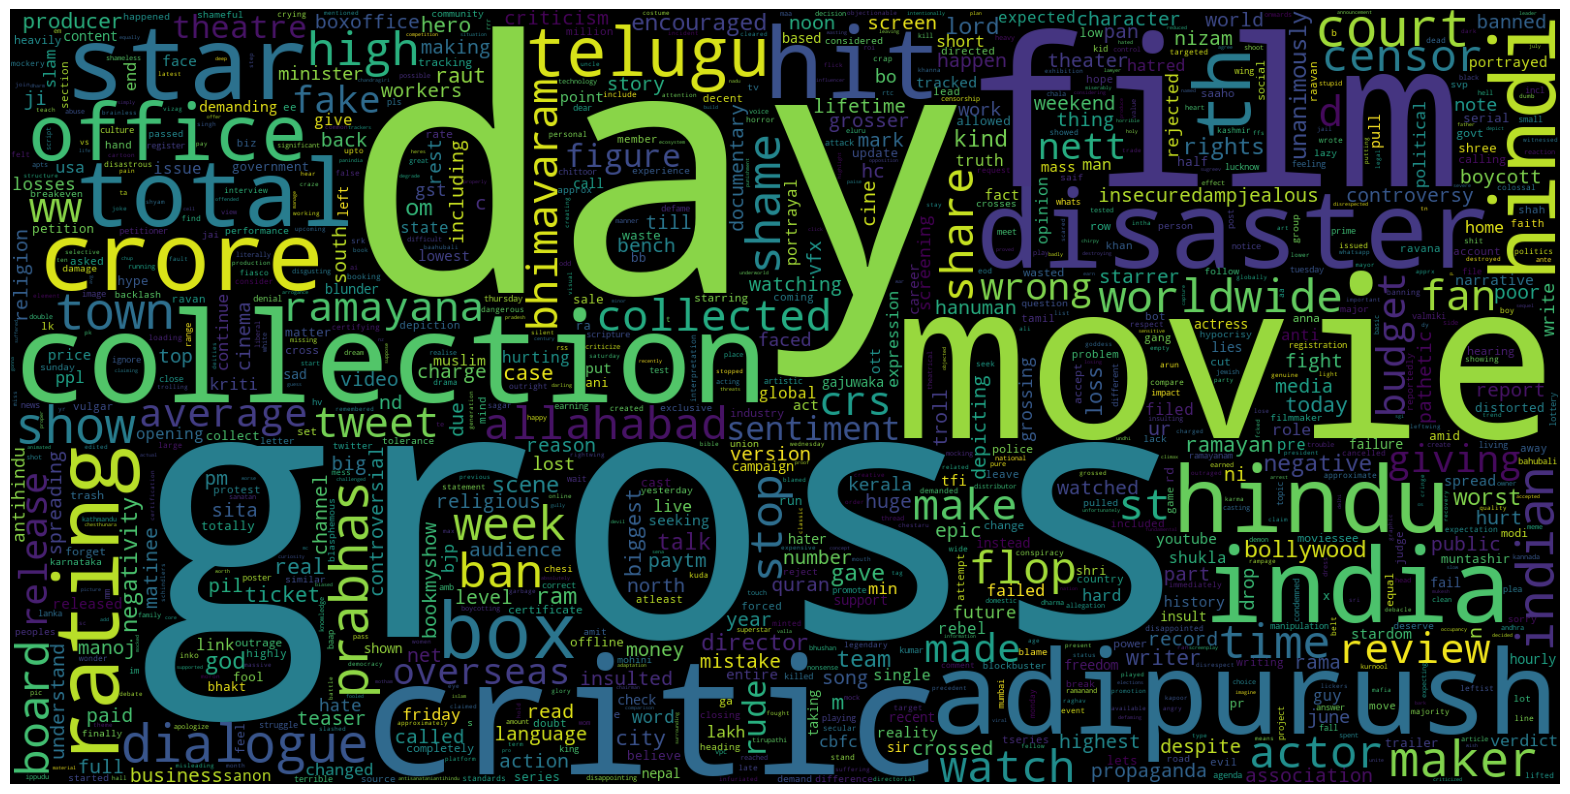

In [ ]:
data = df2[df2['overall_sentiment']=="negative"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 4. Using Wordcloud to represent the Neutral Sentiment words in the dataset

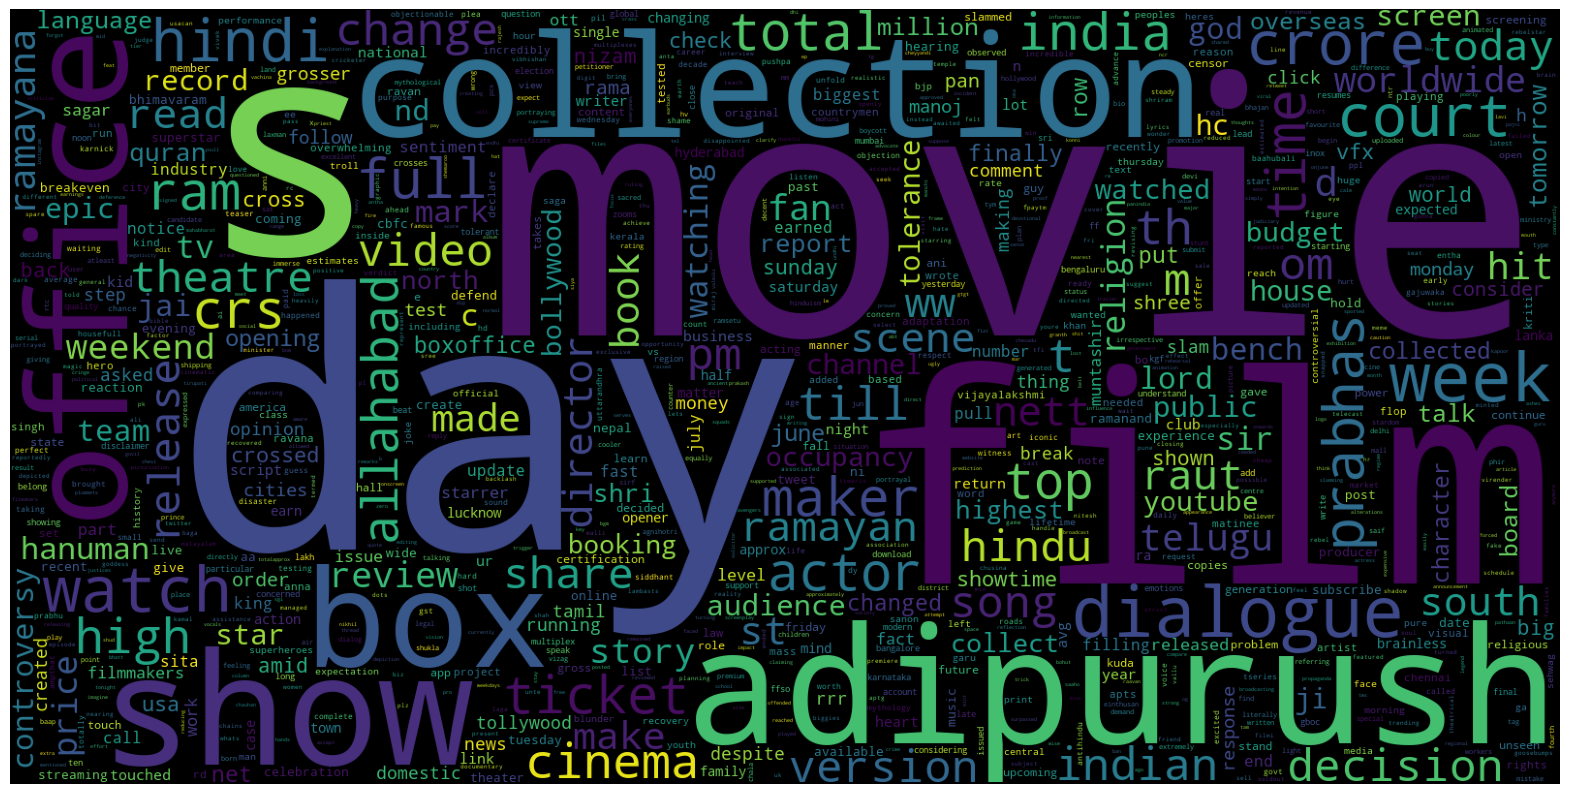

In [ ]:
data = df2[df2['overall_sentiment']=="neutral"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Machine Learning 

In [ ]:
df2.head()

overall_sentiment                             Cleaned_English_Tweets
0           neutral  womens ashes live streaming broadcast tv chann...
1           neutral                                playing book ticket
3           neutral  adipurush vs hoorain vs kerala story controver...
5           neutral  story told learn hotstar india graphic india g...
8          positive  milord compatriots backstab ie end exposing fa...

#### split dataset into train and test data

In [147]:
x = df2['Cleaned_English_Tweets']
y = df2['overall_sentiment']

print(len(x), len(y))

5090 5090


In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

3817 3817
1273 1273


In [149]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [150]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [151]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [152]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<3817x8224 sparse matrix of type '<class 'numpy.float64'>'
	with 38154 stored elements in Compressed Sparse Row format>

In [153]:
texts = df2['Cleaned_English_Tweets']
target = df2['overall_sentiment']

In [154]:
from keras.preprocessing.text import Tokenizer

In [155]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

9571

In [160]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [161]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[2269, 1885,  347, ...,    0,    0,    0],
       [ 481,   36,  103, ...,    0,    0,    0],
       [   5,  482, 2272, ...,    0,    0,    0],
       ...,
       [ 862,  468,  805, ...,    0,    0,    0],
       [2759, 1545, 1414, ...,    0,    0,    0],
       [   3,  815,   98, ...,    0,    0,    0]])

In [162]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('glove.6B.100d.txt', encoding="utf8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

## Using Naive Bayes Algorithm

In [163]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [164]:
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [165]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7227022780832679


## Using Pipeline

In [175]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [177]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

ValueError: Found input variables with inconsistent numbers of samples: [3817, 4072]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
    ))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=80,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc)

Test accuracy: 0.7131630648330058
